### Importing necessary libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical analysis
import matplotlib.pyplot as plt # data visulaization
import seaborn as sns # data visulaization

### Dataset Details

### Loading the dataset

In [2]:
# loading the dataset

# if file is in same directory
data=pd.read_csv("Crop_recommendation.csv")

# if file is in some other location
#data=pd.read_csv(r"F:\Venkatesh\IBM Hack Challenge 2021\Crop_recommendation.csv")


## Exploratory Data Analysis

In [3]:
# print top 5 records
data.head()

# print bottom 5 records
# data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# checking the shape of dataset 
data.shape # (rows,columns)

(2200, 8)

In [5]:
# checking the null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# Statistical data of continous columns
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
# detailed information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
# pring the columns names
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
# used to get the categories value count
data['label'].value_counts()

chickpea       100
watermelon     100
coffee         100
apple          100
jute           100
grapes         100
mango          100
muskmelon      100
coconut        100
mothbeans      100
blackgram      100
orange         100
rice           100
cotton         100
pomegranate    100
banana         100
maize          100
mungbean       100
kidneybeans    100
pigeonpeas     100
lentil         100
papaya         100
Name: label, dtype: int64

In [10]:
# getting the column names
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [11]:
# renaming the column names
data.columns=["Nitrogen","Phosphorous","Potassium",'temperature', 'humidity', 'ph', 'rainfall', 'Crop']
data.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'Crop'],
      dtype='object')

### Finding Null values

In [12]:
# returns the count of null values present in each columns
data.isnull().sum()

# returns True if any column contain any null value 
# data.isnull().any()


Nitrogen       0
Phosphorous    0
Potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

### Label Encoding

In [13]:
# used for encoding the categorical data into numeric
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

# selecting the crop columns as it is an object type
print("Befor label encoding : ",data['Crop'].value_counts())
data['Crop']=le.fit_transform(data['Crop'])
print("After label Encoding : ",data['Crop'].value_counts())

Befor label encoding :  chickpea       100
watermelon     100
coffee         100
apple          100
jute           100
grapes         100
mango          100
muskmelon      100
coconut        100
mothbeans      100
blackgram      100
orange         100
rice           100
cotton         100
pomegranate    100
banana         100
maize          100
mungbean       100
kidneybeans    100
pigeonpeas     100
lentil         100
papaya         100
Name: Crop, dtype: int64
After label Encoding :  21    100
19    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
16    100
18    100
20    100
1     100
3     100
5     100
7     100
9     100
11    100
13    100
15    100
17    100
0     100
Name: Crop, dtype: int64


### Independent and dependent 

In [14]:
# 0 to 6 index is our input features
x=data.iloc[:,0:7] # [rows,columns]
x.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [15]:
# 7 index is our output feature
y=data.iloc[:,7:]
y.head()

,Crop
0,20
1,20
2,20
3,20
4,20


### Feature Selection

#### Anova Test or F Test

In [16]:
# ANOVA Test
from sklearn.feature_selection import f_classif, SelectKBest
ftest=SelectKBest(score_func=f_classif,k=5)
ftest.fit(x,y)

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SelectKBest(k=5)

In [17]:
# returns the top k records as True which are more related
ftest.get_support()

array([ True,  True,  True, False,  True, False,  True])

In [18]:
# f scores of each input columns
ftest.scores_

array([  897.56818633,  1885.65785918, 27238.36206708,   102.18698123,
        3103.70889122,    60.34403353,   605.52796614])

In [19]:
# p value of each input columns
ftest.pvalues_

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.01932382e-305,
       0.00000000e+000, 6.49316190e-199, 0.00000000e+000])

In [20]:
# converting all the scores with features in one dataframe
score=pd.DataFrame(ftest.scores_)
pvalue=pd.DataFrame(ftest.pvalues_)
col=pd.DataFrame(data.columns)
feature_scores=pd.concat([col,score,pvalue],axis=1)
feature_scores.columns=['Inputs','F-Score','P-Value']
feature_scores.nlargest(7,columns='F-Score')


,Inputs,F-Score,P-Value
2,Potassium,27238.362067,0.000000e+00
4,humidity,3103.708891,0.000000e+00
1,Phosphorous,1885.657859,0.000000e+00
0,Nitrogen,897.568186,0.000000e+00
6,rainfall,605.527966,0.000000e+00
3,temperature,102.186981,4.019324e-305
5,ph,60.344034,6.493162e-199


In [21]:
# Mutual Information gain for classification
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(x,y)

# creating a DataFrame and storing the mutual info
MIscore=pd.DataFrame(MI)
#renaming the index with feature names
MIscore.index=x.columns

# sorting the dataframe wrt mutual info score
MIscore.sort_values(ascending=False,by=0)

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,0
humidity,1.729954
Potassium,1.647494
rainfall,1.637358
Phosphorous,1.303899
temperature,1.017901
Nitrogen,0.986020
ph,0.686067


In [22]:
data1=data.loc[:,][data['Crop']<5]

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


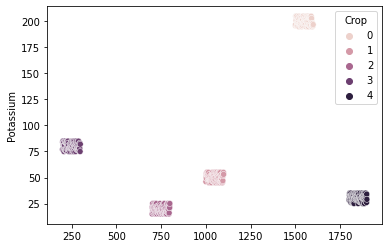

In [23]:
sns.scatterplot(data1.index,data1['Potassium'],hue=data1['Crop'])
plt.show()

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


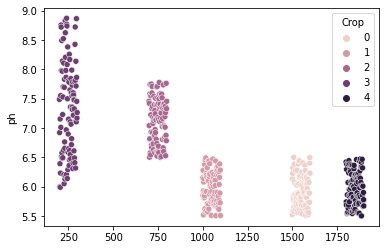

In [24]:
sns.scatterplot(data1.index,data1['ph'],hue=data1['Crop'])
plt.show()

### Train and test split

In [25]:
# train test split with 80% of traing and 20 % of testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Model Building

In [26]:
# applying classification machine learning algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
x_test

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514
...,...,...,...,...,...,...,...
446,32,70,20,20.893427,46.248565,6.208843,195.569787
1005,93,94,53,25.866324,84.423793,6.079179,114.535750
1919,117,56,15,25.992374,77.054355,7.368258,89.118821
708,27,64,21,32.842130,68.684015,7.543804,73.671662


### Model Prediction

In [28]:
# predicting the results with the trained model
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc_train=dtc.predict(x_train)

### Evaluation metrics

In [29]:
# checking the model accuracy
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred_dtc)
#accuracy_score(y_train,y_pred_dtc_train)

0.990909090909091

In [30]:
# classification report of our model
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       1.00      0.95      0.98        22
           3       0.92      1.00      0.96        23
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.95      1.00      0.98        21
           9       1.00      0.90      0.95        20
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       0.96      1.00      0.98        25
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        23
          17       1.00    

In [34]:
# saving our model into a pickle file
import pickle
pickle.dump(dtc,open('crop_recommend_new.pkl','wb'))